In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [38]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [39]:

df['average_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3
df['pass'] = df['average_score'].apply(lambda x: 1 if x >= 50 else 0)  # 1 = Pass, 0 = Fail
df.drop(['math score', 'reading score', 'writing score', 'average_score'], axis=1, inplace=True)
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [40]:
X = df.drop('pass', axis=1)
y = df['pass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [41]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.865
Confusion Matrix:
 [[  0  27]
 [  0 173]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00        27
           1       0.86      1.00      0.93       173

    accuracy                           0.86       200
   macro avg       0.93      0.50      0.46       200
weighted avg       0.88      0.86      0.80       200



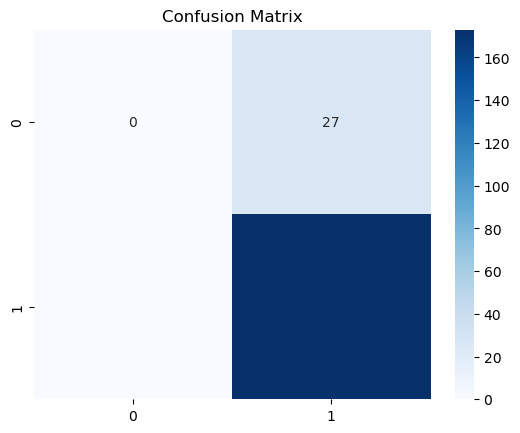

In [42]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [43]:
import joblib
joblib.dump(model, 'student_model.pkl')


['student_model.pkl']

In [44]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [45]:
# Step 1: Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import joblib
from sklearn.preprocessing import LabelEncoder

# Step 2: Load Dataset
df = pd.read_csv("StudentsPerformance.csv")

# Step 3: Feature Engineering
df['average_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3
df['pass'] = df['average_score'].apply(lambda x: 1 if x >= 50 else 0)

df.drop(['math score', 'reading score', 'writing score', 'average_score'], axis=1, inplace=True)

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Step 4: Train Model
X = df.drop('pass', axis=1)
y = df['pass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced')

In [46]:
import joblib
joblib.dump(model, 'student_model.pkl')


['student_model.pkl']